<a href="https://colab.research.google.com/github/bichu136/CS114.L11.KHCL/blob/master/Pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://cs.uit.edu.vn/data.txt

--2020-11-02 00:36:37--  http://cs.uit.edu.vn/data.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84410 (82K) [text/plain]
Saving to: ‘data.txt.3’

data.txt.3          100%[===================>]  82.43K   185KB/s    in 0.4s    

2020-11-02 00:36:38 (185 KB/s) - ‘data.txt.3’ saved [84410/84410]



In [ ]:
!wget http://cs.uit.edu.vn/data3.txt

--2020-10-18 16:19:01--  http://cs.uit.edu.vn/data3.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... Read error (Connection timed out) in headers.
Retrying.

--2020-10-18 16:34:02--  (try: 2)  http://cs.uit.edu.vn/data3.txt
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178891 (175K) [text/plain]
Saving to: ‘data3.txt’

data3.txt           100%[===================>] 174.70K  --.-KB/s    in 0.1s    

2020-10-18 16:34:02 (1.44 MB/s) - ‘data3.txt’ saved [178891/178891]



In [ ]:
! cat data.txt

In [ ]:
! cat data3.txt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# file data.txt
data = pd.read_csv('data.txt', header=None)
X  = data[0]
Y  = data[1]

# Split the data into training/testing sets
X_train = np.array(X[:-1000])
X_test = np.array(X[-1000:])

# Split the targets into training/testing sets
Y_train = np.array(Y[:-1000])
Y_test = np.array(Y[-1000:])

print(X.shape)
print(X_test.shape)

(5211,)
(1000,)


In [ ]:
X_trial = X_test.reshape(-1, 1)
print(X_trial)
X_trial = feature_engineering(X_trial)
print(X_trial)

In [ ]:
def one_feature(X):
  return X.reshape(-1, 1)

In [ ]:
def multi_feature(X, Fe):
  X = X.reshape(-1,1)
  return np.hstack((X, (np.array(Fe)).reshape(-1, 1) ))

In [ ]:
def feature_engineering(X):
  X = X.reshape(-1,1)
  return np.hstack((X, np.ones((X.shape[0], 1)) ))

In [ ]:
# file data3.txt
data = pd.read_csv('data3.txt', header=None)
X3  = data[0]
Y3  = data[1]

# Split the data into training/testing sets
X3_train = np.array(X[:-1000])
X3_test = np.array(X[-1000:])

# Split the targets into training/testing sets
Y3_train = np.array(Y[:-1000])
Y3_test = np.array(Y[-1000:])

In [ ]:
# # # Multi-feature dataset processing
list = [np.log2(val) for val in X[:]]
print(len(list))

5211


In [ ]:
print(feature_engineering(Y_train))

[[1.20058   1.       ]
 [0.509774  1.       ]
 [1.47608   1.       ]
 ...
 [2.31565   1.       ]
 [0.0343877 1.       ]
 [2.71448   1.       ]]


Coefficients: 
 [[2.84130124e-07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Mean squared error: 0.000532
Coefficient of determination: 0.999196


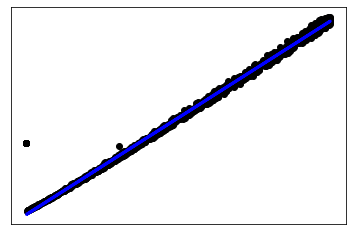

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# # # Single-feature Linear Regression
# X_train = one_feature(X_train)
# Y_train = one_feature(Y_train)
# X_test = one_feature(X_test)
# Y_test = one_feature(Y_test)


# # Multi-feature Linear Regression
# h = a*x -> h = a*x1 + b*x0 with x0 = 1
X_train = feature_engineering(X_train)
Y_train = feature_engineering(Y_train)

# h = a*x -> h = a*x1 + b*x0 with x0 = 1
X_test = feature_engineering(X_test)
Y_test = feature_engineering(Y_test)

# Train the model using the training sets
regr.fit(X_train, Y_train)


# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.6f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.6f'
      % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()